In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data

df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Data Preparation and Data Cleaning 

In [4]:
# Creating the copy of the original data
df_copy = df.copy()

In [5]:
#Standardizing the names of the columns to small case letters 

df_copy.columns = df_copy.columns.str.lower().str.replace(' ', '_')

In [6]:
# To check the missing values in the dataframe
df_copy.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

In [7]:
#Dimension/Shape of the dataframe 

df_copy.shape

(3276, 10)

In [7]:
#Filling the missing values of each columns
df_copy = df_copy.fillna(method='pad')

In [8]:
#Check again for the missing values
df_copy.isnull().sum()

ph                 1
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [9]:
#Fill the missing value of ph column by 7.08 i.e the mean of the same
df_copy.ph = df_copy.ph.fillna(7.08)

In [10]:
#Import package for splitting the dataset in train, test and validation
from sklearn.model_selection import train_test_split

In [11]:
#Here we use 60% data for training, 20% for test and 20% for validation 

df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
#Check the dimension of train, test and validation data after splitting

len(df_train), len(df_val), len(df_test)

(1965, 655, 656)

In [14]:
#After splitting the dataframe into train, test and validation, we need to reset the index of each dataset

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
# Getting the label/target variable from train, test and validation 
y_train = df_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

In [16]:
#After extracting the target variable, delete it from datasets so as to avoid accidently using it for training purpose
del df_train['potability']
del df_val['potability']
del df_test['potability']

# EDA & Feature Importance Analysis

In [17]:
#EDA
#Check the correlation of each RV/Feature with the Traget variable}
df_full_train.corrwith(df_full_train.potability)

ph                -0.005955
hardness          -0.018297
solids             0.036416
chloramines        0.010072
sulfate           -0.016348
conductivity       0.004265
organic_carbon    -0.018066
trihalomethanes    0.010433
turbidity          0.010532
potability         1.000000
dtype: float64

In [18]:
#Check the mean samples (where ph value < 6.5) which is not potable
df_full_train[df_full_train.ph <= 6.5].potability.mean()

0.35947712418300654

In [19]:
#Check the mean samples (where ph value > 8.5) which is not potable
df_full_train[df_full_train.ph >= 8.5].potability.mean()

0.3261802575107296

In [20]:
##Check the mean samples (where ph value > 6.52 and < 6.83) which is potable
df_full_train[(df_full_train.ph >= 6.52) & (df_full_train.ph <= 6.83)].potability.mean()

0.410958904109589

In [21]:
#Check the mean samples (where solids < 500 mg/l) which is not potable
df_full_train[df_full_train.solids <= 500].potability.mean()

0.0

In [22]:
#Check the mean samples (where solids > 1000 mg/l) which is not potable
df_full_train[df_full_train.solids > 1000].potability.mean()

0.37967914438502676

In [23]:
##Check the mean samples (where solids/minerals value > 500 and <= 1000) which is potable
df_full_train[(df_full_train.solids >= 500) & (df_full_train.solids <= 1000)].potability.mean()

1.0

In [24]:
#Check the mean samples (where chloramines < 4 mg/l) which is potable
df_full_train[df_full_train.chloramines <= 4].potability.mean()

0.3582089552238806

#  Model Selection Process and Parameter Tuning

In [20]:
#import the DictVectorizer package
from sklearn.feature_extraction import DictVectorizer

In [26]:
#Converting the train, validation dataset to DV Matrix format 

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

### Logistic Regression 

In [27]:
# import the LogisticRegression package for sklearn
from sklearn.linear_model import LogisticRegression

In [28]:
#Initializing the LR instance and fitting the model of our training dataset

model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#Check the interect or bias value for the LR model 
model.intercept_[0]

-3.7834493483810762e-06

In [30]:
#Check all the coefficients or weights of the LR model
model.coef_[0]

array([-9.92049665e-06,  2.25628026e-04, -9.58466035e-04, -9.87745187e-05,
       -4.33197248e-05,  6.99910010e-06, -1.54965752e-03, -1.86372057e-04,
       -2.05804215e-05])

In [31]:
#Getting the prediction probability from trained LR model
y_pred = model.predict_proba(X_val)[:, 1]

In [32]:
# The decision boundry for target variable
potability_decision = (y_pred >= 0.50)

In [33]:
#Accuracy calculation using manual way
(y_val.astype('bool') == potability_decision ).mean()

0.6351145038167939

In [34]:
#importing the accuracy package from sklearn
from sklearn.metrics import accuracy_score

In [35]:
# Accuracy calculation for the trained model

accuracy_score(y_val, y_pred >= 0.50)

0.6351145038167939

In [37]:
#To check the accuracy of the model for different threshold levels between 0 and 1

thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.366
0.05 0.366
0.10 0.366
0.15 0.366
0.20 0.366
0.25 0.366
0.30 0.366
0.35 0.366
0.40 0.595
0.45 0.635
0.50 0.635
0.55 0.634
0.60 0.634
0.65 0.634
0.70 0.634
0.75 0.634
0.80 0.634
0.85 0.634
0.90 0.634
0.95 0.634
1.00 0.634


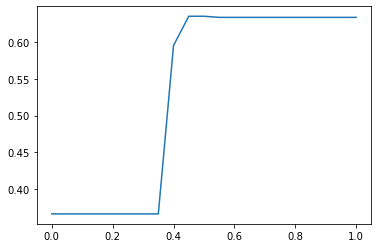

In [38]:
#plot the different thresholds Vs the scores
plt.plot(thresholds, scores)

In [39]:
#A collection from python to count
from collections import Counter

In [40]:
Counter(y_pred >= 1.0)

Counter({False: 655})

In [41]:
Counter(y_val >=1)

Counter({True: 240, False: 415})

In [42]:
# Import the roc_curve package from sklearn 
from sklearn.metrics import roc_curve

In [43]:
#we get fpr, tpr and thresholds for roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

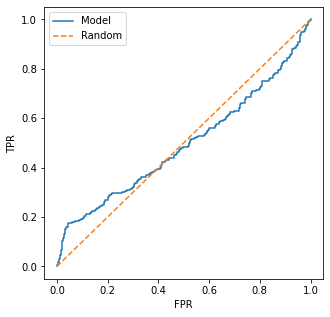

In [44]:
#Plotting the ROC Curve

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [13]:
#package for auc and auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [46]:
#Get the AUC for our trained model
auc(fpr, tpr)

0.49440763052208836

## Decision Tree

In [47]:
#Using the Tree Based Methods

#import the Decision tree Classifier and other related package
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


In [48]:
dt = DecisionTreeClassifier()

In [49]:
# Fitting Decision Tree
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# Prediction on validation data
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5541415662650602

In [51]:
# Prediction on training data
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)


1.0

#### Decision Tree Parameter Tuning

In [52]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [53]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.5730523780854907
val: 0.5488002008032129


In [54]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- sulfate <= 260.92
|   |--- hardness <= 187.89
|   |   |--- class: 1
|   |--- hardness >  187.89
|   |   |--- class: 1
|--- sulfate >  260.92
|   |--- sulfate <= 363.35
|   |   |--- class: 0
|   |--- sulfate >  363.35
|   |   |--- class: 0



/home/modf/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
# Decision trees parameter tuning
depths = [1, 2, 3, 4, 5, 6,7,8,9, 10, 12,15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.517
   2 -> 0.549
   3 -> 0.572
   4 -> 0.587
   5 -> 0.592
   6 -> 0.607
   7 -> 0.588
   8 -> 0.609
   9 -> 0.552
  10 -> 0.556
  12 -> 0.565
  15 -> 0.548
  20 -> 0.519
None -> 0.530


In [56]:
scores = []

for depth in [ 5, 6, 7, 8]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [57]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [58]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             5      6      7      8
min_samples_leaf                            
1                 0.592  0.611  0.591  0.603
5                 0.598  0.608  0.587  0.604
10                0.595  0.621  0.596  0.618
15                0.612  0.638  0.617  0.627
20                0.603  0.620  0.596  0.597
100               0.620  0.619  0.626  0.622
200               0.592  0.592  0.592  0.592
500               0.556  0.556  0.556  0.556

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

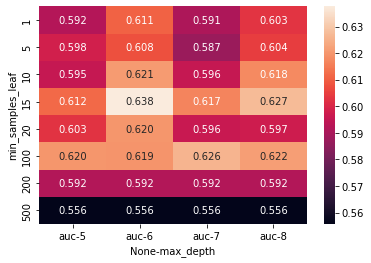

In [59]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [60]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [63]:
print(export_text(dt, feature_names=dv.get_feature_names()))


|--- sulfate <= 260.92
|   |--- hardness <= 187.89
|   |   |--- class: 1
|   |--- hardness >  187.89
|   |   |--- ph <= 6.48
|   |   |   |--- class: 0
|   |   |--- ph >  6.48
|   |   |   |--- class: 1
|--- sulfate >  260.92
|   |--- sulfate <= 363.35
|   |   |--- ph <= 5.02
|   |   |   |--- hardness <= 221.62
|   |   |   |   |--- chloramines <= 6.22
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- chloramines >  6.22
|   |   |   |   |   |--- hardness <= 144.86
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hardness >  144.86
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- hardness >  221.62
|   |   |   |   |--- class: 0
|   |   |--- ph >  5.02
|   |   |   |--- sulfate <= 307.25
|   |   |   |   |--- ph <= 6.74
|   |   |   |   |   |--- chloramines <= 5.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chloramines >  5.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ph >  6.74
|   |   |   |   |   |--- chloramines <= 7.52
|   |   |

/home/modf/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Random Forest Classifier Model

In [14]:
#import the randomforest package
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Train the RF classifier for different n_estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [63]:
#create the dataframe using the n_estimator and AUC
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

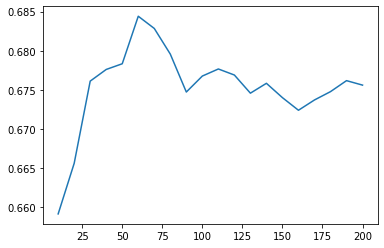

In [64]:
# Plotting n_estimators Vs AUC
plt.plot(df_scores.n_estimators, df_scores.auc)

In [65]:
# Choose the Depth of the trees to grow
scores = []

for d in [5,6,7, 10,12, 15,18]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))


In [66]:
#Dataframe for max_depth, n_estimator and auc
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


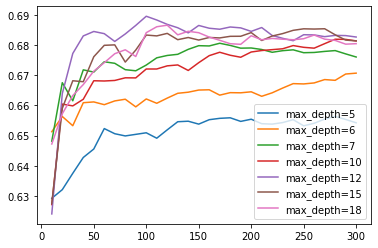

In [67]:
# Plotting the n_estimator Vs AUC for different max_depth
for d in [5,6,7, 10,12, 15,18]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [68]:
# Based on the graph above, we choose the max_depth=15 which gives the max AUC
max_depth = 18

In [69]:
# Choosing the different min_samples_leaf for the max_depth=15
scores = []

for s in [1, 3, 5,7, 10,15,20,25, 50]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [70]:
# Dataframe for min_samples_leaf, n_estimators, auc
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

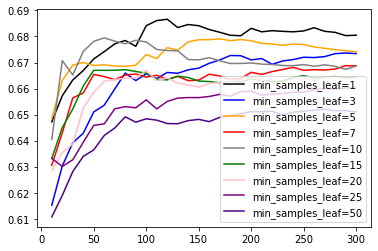

In [71]:
# Plotting n_estimators Vs AUC for different min_samples_leaf
colors = ['black', 'blue', 'orange', 'red', 'grey', 'green','pink','purple','indigo']
values = [1, 3, 5,7, 10,15,20,25, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [72]:
# Based on the above graph, choose the best min_samples_leaf and n_estimators
min_samples_leaf = 1

In [73]:
rf = RandomForestClassifier(n_estimators=260,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=260, random_state=1)

# XGBoost Model

In [84]:
# import xgboost package
import xgboost as xgb

In [85]:
# Preparing the DMatrix for xgb model
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/home/modf/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
# Training the xgb model using the default parameters

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [87]:
# prediction of trained xgb model
y_pred = model.predict(dval)

In [88]:
# auc score for xgb default model
roc_auc_score(y_val, y_pred)

0.6423744979919679

In [89]:
# Create a watchlist to track the metioned metrices
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [92]:
%%capture output

# Parameter Tuning for XGB Model
xgb_params = {
    'eta': 0.3, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=260,
                  verbose_eval=5,
                  evals=watchlist)

In [93]:
# storing the output of std 
s = output.stdout

In [94]:
print(s[:260])

[0]	train-auc:0.92536	val-auc:0.58932
[5]	train-auc:0.99869	val-auc:0.64617
[10]	train-auc:0.99999	val-auc:0.64528
[15]	train-auc:1.00000	val-auc:0.65441
[20]	train-auc:1.00000	val-auc:0.65422
[25]	train-auc:1.00000	val-auc:0.65726
[30]	train-auc:1.00000	val-a


In [95]:
# A function to parse the output of the xgb model

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


In [96]:
#scores of xgb model
df_score = parse_xgb_output(output)

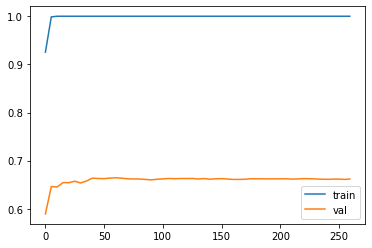

In [98]:
# plotting the xgb output for training and validation datatset
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

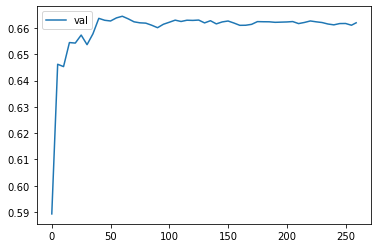

In [99]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()


### XGBoost Parameters Tuning

In [101]:
#XGBoost Parameter Tuning

scores = {}

In [102]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=55,
                  verbose_eval=5,
                  evals=watchlist)

In [103]:
scores = {}


In [104]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key


'eta=0.01'

In [105]:
scores = {}

In [106]:
%%capture output

xgb_params = {
    'eta': 0.03, 
    'max_depth': 6,
    'min_child_weight': 1,
    'lambda': 15,
    'alpha': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
#     'subsample': 0.5,

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  verbose_eval=5,
                  evals=watchlist)


In [107]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key


'max_depth=6'

In [108]:
# del scores['max_depth=15']
scores


{'max_depth=6':      num_iter  train_auc  val_auc
 0           0    0.61696  0.56297
 1           5    0.64873  0.58944
 2          10    0.65459  0.59362
 3          15    0.66188  0.59740
 4          20    0.66383  0.59857
 ..        ...        ...      ...
 96        480    0.78677  0.65900
 97        485    0.78677  0.65900
 98        490    0.78677  0.65900
 99        495    0.78677  0.65900
 100       499    0.78677  0.65900
 
 [101 rows x 3 columns]}

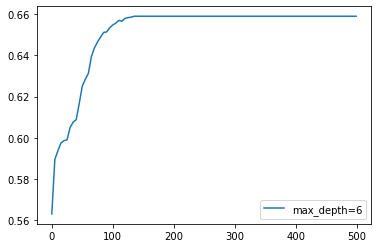

In [109]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()


## Choose the best model and train it for train and validation data

In [15]:
# Selecting the train+validation=full_train_dataset dataset
df_full_train = df_full_train.reset_index(drop=True)

In [16]:
# shape of the dataset
df_full_train.shape

(2620, 10)

In [17]:
# getting the target values for complete dataset
y_full_train = df_full_train.potability.values

In [18]:
# delete the target variable from the dataset 
del df_full_train['potability']

In [21]:
# Preparing the training and test dataset using the Dictvectorizer

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [22]:
# This is the best model we selected 
rf = RandomForestClassifier(n_estimators=260,
                            max_depth=18,
                            min_samples_leaf=1, #min_samples_leaf,
                            random_state=1)


In [23]:
#Training the model
rf.fit(X_full_train, y_full_train)

# Prediction from model
y_pred = rf.predict_proba(X_test)[:, 1]

#AUC of the model for test dataset(unseen)
auc = roc_auc_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [20]:
#The AUC of the final model is 
auc

1.0

Conclusion - We trained multiple models - Logistic Regression, Decision Trees, RandomForest Classifier, XGBoost and found out that RandomForest gives the best AUC for the test set and we finalize it for the deployment.